In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import zipfile,os
import os

import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.models import Sequential

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'sulaimann'
os.environ['KAGGLE_KEY'] = '88952eb3c31573d4ef92c24dbb078df4'

In [3]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 97% 322M/330M [00:02<00:00, 133MB/s]
100% 330M/330M [00:02<00:00, 141MB/s]


In [4]:
!unzip -q face-mask-12k-images-dataset

In [5]:
base_dir = '/content/Face Mask Dataset/Train'

print('With Mask: ', len(os.listdir('/content/Face Mask Dataset/Train/WithMask')))
print('Without Mask: ', len(os.listdir('/content/Face Mask Dataset/Train/WithoutMask')))

With Mask:  5000
Without Mask:  5000


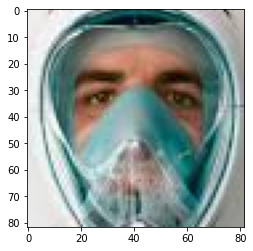

In [6]:
img = image.load_img('/content/Face Mask Dataset/Train/WithMask/10.png')
imgplot = plt.imshow(img)

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        base_dir, # direktori data latih
        shuffle=True,
        target_size=(150,150),
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        shuffle=True,
        target_size=(150,150),
        class_mode='categorical',
        subset='validation')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
# create model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

In [13]:
# callback
class mCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.97):
      print('\nPelatihan dihentikan, Akurasi lebih dari 97% !')
      self.model.stop_training = True

callbacks = mCallback()

In [11]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
history = model.fit(train_generator,
      steps_per_epoch=25,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2,
      callbacks=[callbacks])

Epoch 1/50
25/25 - 45s - loss: 0.8483 - accuracy: 0.6538 - val_loss: 0.4816 - val_accuracy: 0.8750
Epoch 2/50
25/25 - 44s - loss: 0.3563 - accuracy: 0.8475 - val_loss: 0.4241 - val_accuracy: 0.8000
Epoch 3/50
25/25 - 44s - loss: 0.2822 - accuracy: 0.8963 - val_loss: 0.3643 - val_accuracy: 0.8625
Epoch 4/50
25/25 - 43s - loss: 0.3028 - accuracy: 0.8813 - val_loss: 0.3079 - val_accuracy: 0.8938
Epoch 5/50
25/25 - 45s - loss: 0.2771 - accuracy: 0.9000 - val_loss: 0.2802 - val_accuracy: 0.9062
Epoch 6/50
25/25 - 44s - loss: 0.2560 - accuracy: 0.9125 - val_loss: 0.3235 - val_accuracy: 0.8687
Epoch 7/50
25/25 - 43s - loss: 0.2318 - accuracy: 0.9162 - val_loss: 0.2619 - val_accuracy: 0.8938
Epoch 8/50
25/25 - 43s - loss: 0.1857 - accuracy: 0.9438 - val_loss: 0.2469 - val_accuracy: 0.9125
Epoch 9/50
25/25 - 42s - loss: 0.2075 - accuracy: 0.9250 - val_loss: 0.1808 - val_accuracy: 0.9312
Epoch 10/50
25/25 - 42s - loss: 0.2377 - accuracy: 0.9013 - val_loss: 0.2886 - val_accuracy: 0.8938
Epoch 11/

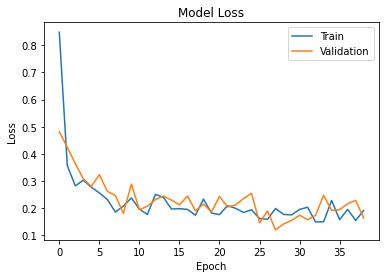

In [15]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

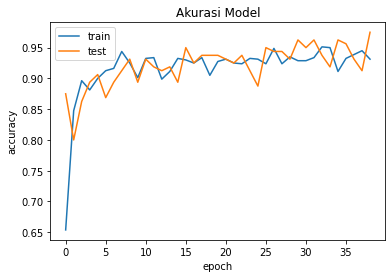

In [16]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving me.JPG to me.JPG
me.JPG
Without Mask


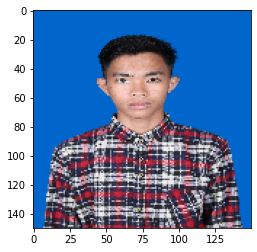

In [18]:
# PREDICTIONS
uploaded = files.upload()
for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('Without Mask')
  elif classes[0][1]==1:
    print('With Mask')
  else:
    print('Unrecognized')

In [19]:
# model convert
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp3d40h0ap/assets


In [21]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)